# Mapeamento de Áreas de Risco de Inundação em São Paulo
## Imersão Profissional: Futuro dos Dados e Aplicação de Big Data (173493)
### Aluno: Yuri Fonseca da Silva



In [132]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import re

### Importando a base de dados e ajustando as colunas com data/hora


In [133]:
url = 'https://raw.githubusercontent.com/YuriLunix/incidentes_SP/refs/heads/main/dadosabertos-artesp-sp-gov-br.csv'
df = pd.read_csv(url, parse_dates=['DATA E HORA INICIO', 'DATA E HORA FIM'])

In [134]:
#Conferindo o tipo das variáveis importadas
df.dtypes


_id                               int64
DATA E HORA INICIO       datetime64[ns]
DATA E HORA FIM          datetime64[ns]
CONCESSIONARIA                   object
RODOVIA                          object
KM                               object
SENTIDO                          object
TIPO                             object
ORIGEM                           object
REGIAO ADMINISTRATIVA            object
MUNICIPIO                        object
dtype: object

In [135]:
#Corrigindo o nome das colunas deixando somente em letra minúscula e sem caracteres especiais
def ajuste_titulos(tit_nome):
    tit_nome = tit_nome.lower()
    tit_nome = re.sub(r"[ /|]+", "_", tit_nome)  
    tit_nome = re.sub(r"[^\w_]", "", tit_nome)   
    return tit_nome.strip("_")        

### Filtrando apenas a capital e Grande São Paulo.

In [136]:
grandeSP = df[df['REGIAO ADMINISTRATIVA'].isin(['SÃO PAULO', 'REG. METROPOLITANA SÃO PAULO'])]

In [137]:
grandeSP = df.loc[df['REGIAO ADMINISTRATIVA'].isin(['SÃO PAULO', 'REG. METROPOLITANA SÃO PAULO'])]
grandeSP

,_id,DATA E HORA INICIO,DATA E HORA FIM,CONCESSIONARIA,RODOVIA,KM,SENTIDO,TIPO,ORIGEM,REGIAO ADMINISTRATIVA,MUNICIPIO
8,9,2025-06-30 20:17:35,2025-06-30 20:52:07,L25-SPMAR,SP021,"36,600",INTERNO,PANE ELÉTRICA,EQUIPAMENTO - CALL BOX,REG. METROPOLITANA SÃO PAULO,ITAPECERICA DA SERRA
9,10,2025-06-30 20:11:15,2025-06-30 20:30:09,L25-SPMAR,SP021,"68,000",INTERNO,PANE ELÉTRICA,0800,REG. METROPOLITANA SÃO PAULO,SÃO BERNARDO DO CAMPO
15,16,2025-06-30 19:48:10,2025-06-30 20:41:44,L22-ECOVIAS IMIGRANTES,SP150,"25,000",SUL,PANE ELÉTRICA,0800,REG. METROPOLITANA SÃO PAULO,SÃO BERNARDO DO CAMPO
16,17,2025-06-30 19:45:14,2025-06-30 21:07:38,L25-SPMAR,SP021,"64,100",EXTERNO,PANE ELÉTRICA,0800,REG. METROPOLITANA SÃO PAULO,SÃO PAULO
19,20,2025-06-30 19:00:51,2025-06-30 20:27:03,L24-RODOANEL,SP021,"19,000",EXTERNO,PANE ELÉTRICA,CHATBOT,REG. METROPOLITANA SÃO PAULO,CARAPICUÍBA
...,...,...,...,...,...,...,...,...,...,...,...
29971,29972,2024-08-16 09:52:20,2024-08-16 10:30:51,L24-RODOANEL,SP021,"15,500",INTERNO,PANE ELÉTRICA,CHATBOT,REG. METROPOLITANA SÃO PAULO,CARAPICUÍBA
29982,29983,2024-08-16 07:55:06,2024-08-16 08:29:39,L23-LESTE PAULISTA,SP070,"29,500",OESTE,PANE ELÉTRICA,EQUIPAMENTO - CALL BOX,REG. METROPOLITANA SÃO PAULO,GUARULHOS
29989,29990,2024-08-16 06:47:22,2024-08-16 07:22:25,L12-VIAOESTE,SP280,"27,000",OESTE,PANE ELÉTRICA,0800,REG. METROPOLITANA SÃO PAULO,BARUERI
29990,29991,2024-08-16 06:47:16,2024-08-16 07:13:33,L12-VIAOESTE,SP280,"23,800",OESTE,PANE ELÉTRICA,CHATBOT,REG. METROPOLITANA SÃO PAULO,BARUERI


### Mostrando locais onde o incidente durou 1 hora ou menos.

In [138]:
grandeSP = df.loc[df['REGIAO ADMINISTRATIVA'].isin(['SÃO PAULO', 'REG. METROPOLITANA SÃO PAULO'])]
grandeSP

,_id,DATA E HORA INICIO,DATA E HORA FIM,CONCESSIONARIA,RODOVIA,KM,SENTIDO,TIPO,ORIGEM,REGIAO ADMINISTRATIVA,MUNICIPIO
8,9,2025-06-30 20:17:35,2025-06-30 20:52:07,L25-SPMAR,SP021,"36,600",INTERNO,PANE ELÉTRICA,EQUIPAMENTO - CALL BOX,REG. METROPOLITANA SÃO PAULO,ITAPECERICA DA SERRA
9,10,2025-06-30 20:11:15,2025-06-30 20:30:09,L25-SPMAR,SP021,"68,000",INTERNO,PANE ELÉTRICA,0800,REG. METROPOLITANA SÃO PAULO,SÃO BERNARDO DO CAMPO
15,16,2025-06-30 19:48:10,2025-06-30 20:41:44,L22-ECOVIAS IMIGRANTES,SP150,"25,000",SUL,PANE ELÉTRICA,0800,REG. METROPOLITANA SÃO PAULO,SÃO BERNARDO DO CAMPO
16,17,2025-06-30 19:45:14,2025-06-30 21:07:38,L25-SPMAR,SP021,"64,100",EXTERNO,PANE ELÉTRICA,0800,REG. METROPOLITANA SÃO PAULO,SÃO PAULO
19,20,2025-06-30 19:00:51,2025-06-30 20:27:03,L24-RODOANEL,SP021,"19,000",EXTERNO,PANE ELÉTRICA,CHATBOT,REG. METROPOLITANA SÃO PAULO,CARAPICUÍBA
...,...,...,...,...,...,...,...,...,...,...,...
29971,29972,2024-08-16 09:52:20,2024-08-16 10:30:51,L24-RODOANEL,SP021,"15,500",INTERNO,PANE ELÉTRICA,CHATBOT,REG. METROPOLITANA SÃO PAULO,CARAPICUÍBA
29982,29983,2024-08-16 07:55:06,2024-08-16 08:29:39,L23-LESTE PAULISTA,SP070,"29,500",OESTE,PANE ELÉTRICA,EQUIPAMENTO - CALL BOX,REG. METROPOLITANA SÃO PAULO,GUARULHOS
29989,29990,2024-08-16 06:47:22,2024-08-16 07:22:25,L12-VIAOESTE,SP280,"27,000",OESTE,PANE ELÉTRICA,0800,REG. METROPOLITANA SÃO PAULO,BARUERI
29990,29991,2024-08-16 06:47:16,2024-08-16 07:13:33,L12-VIAOESTE,SP280,"23,800",OESTE,PANE ELÉTRICA,CHATBOT,REG. METROPOLITANA SÃO PAULO,BARUERI


In [139]:
#Visualizando rápidos incidentes
px.line(grandeSP, x='DATA E HORA INICIO', y='DATA E HORA FIM',
        labels={'DATA E HORA INICIO':'Data', 'DATA E HORA FIM':'Tempo'},
       title='Gráfico de incidentes curtos')

### Locais mais afetados

In [140]:
df_municipios = df['MUNICIPIO'].value_counts().reset_index()
df_municipios.columns = ['MUNICIPIO', 'Quantidade de Incidentes']

In [141]:
fig = px.bar(df_municipios,
             x='MUNICIPIO',
             y='Quantidade de Incidentes',
             title='Quantidade de Incidentes por Município',
             labels={'Município': 'Município', 'Quantidade de Incidentes': 'Nº de Registros'},
             color='Quantidade de Incidentes')
fig.show()

#### Taxa de incidente por tempo

In [142]:
def taxa_diaria(df, coluna_data='data_e_hora_inicio'):
    df[coluna_data] = pd.to_datetime(df[coluna_data], errors='coerce', dayfirst=True)
    df['data'] = df[coluna_data].dt.date
    taxa_diaria = df.groupby('data').size().reset_index(name='quantidade_incidentes')
    
    return taxa_diaria

In [143]:
taxa_diaria = taxa_diaria(grandeSP, 'DATA E HORA INICIO')
taxa_diaria

C:\Users\hc12384827\AppData\Local\Temp\ipykernel_19876\2245609399.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hc12384827\AppData\Local\Temp\ipykernel_19876\2245609399.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,data,quantidade_incidentes
0,2024-08-16,22
1,2024-08-17,13
2,2024-08-18,15
3,2024-08-19,20
4,2024-08-20,16
...,...,...
314,2025-06-26,21
315,2025-06-27,24
316,2025-06-28,18
317,2025-06-29,21


In [144]:
df_concessionaria = df['CONCESSIONARIA'].value_counts().reset_index()
df_concessionaria.columns = ['CONCESSIONARIA', 'Quantidade de Incidentes']

In [145]:
fig = px.bar(df_concessionaria,
             x='CONCESSIONARIA',
             y='Quantidade de Incidentes',
             title='Concessionárias mais prejudicadas',
             labels={'CONCESSIONARIA': 'CONCESSIONARIA', 'Quantidade de Incidentes': 'Nº de Registros'},
             color='Quantidade de Incidentes')
fig.show()

# Predições  
Construindo um modelo de séries temporais para prever os novos incidentes. Antes. analiso a série temporal para ver se há tendência, sazonalidade ou ruído.

In [146]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [147]:
def taxa_diaria(df, coluna_data='DATA E HORA INICIO'):
    df[coluna_data] = pd.to_datetime(df[coluna_data], errors='coerce', dayfirst=True)
    df['data'] = df[coluna_data].dt.date
    taxa_diaria = df.groupby('data').size().reset_index(name='quantidade_incidentes')
    return taxa_diaria

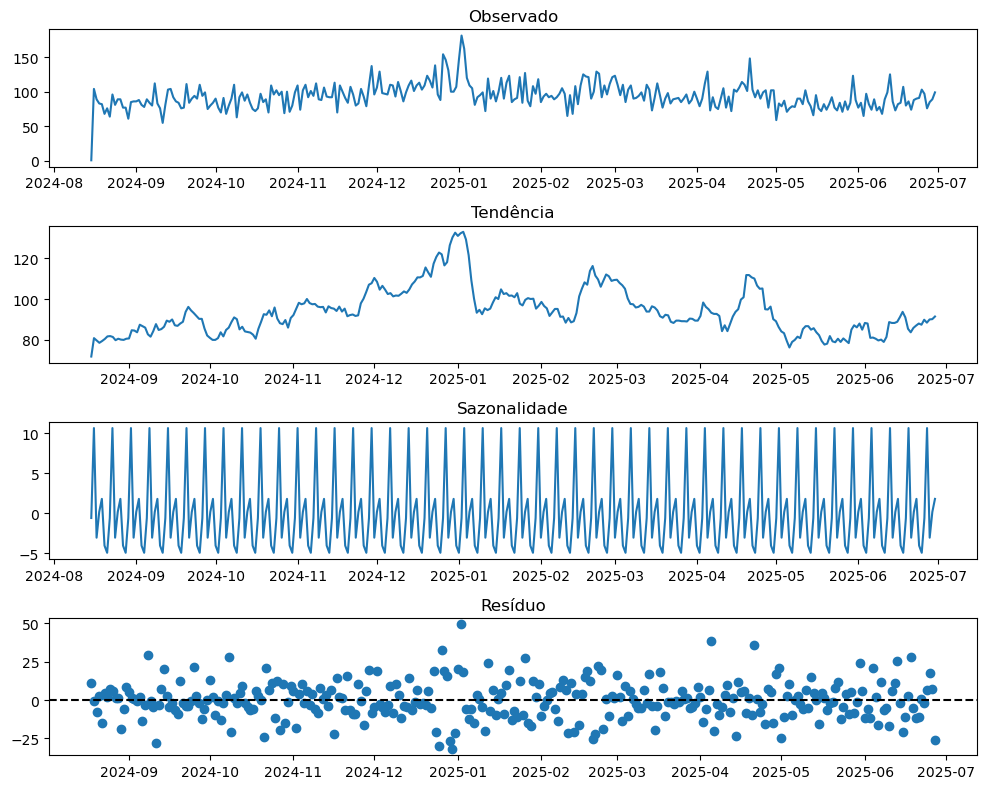

In [148]:

def taxa_diaria(df, coluna_data='DATA E HORA INICIO'):
    df[coluna_data] = pd.to_datetime(df[coluna_data], errors='coerce')
    df['data'] = df[coluna_data].dt.date
    return df.groupby('data').size().reset_index(name='quantidade_incidentes')

df_taxa = taxa_diaria(df)
df_taxa['data'] = pd.to_datetime(df_taxa['data'])
df_taxa.set_index('data', inplace=True)

SP = df.copy()
novosincidentes = df_taxa['quantidade_incidentes']

novosincidentes = novosincidentes.asfreq('D')

# Decomposição
res = seasonal_decompose(novosincidentes, model='additive')

# Plotagem
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
ax1.plot(res.observed)
ax1.set_title('Observado')

ax2.plot(res.trend)
ax2.set_title('Tendência')

ax3.plot(res.seasonal)
ax3.set_title('Sazonalidade')

ax4.scatter(novosincidentes.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
ax4.set_title('Resíduo')

plt.tight_layout()
plt.show()

In [149]:
# Decompondo os incidentes por tipo

In [150]:
confirmados = grandeSP.TIPO
confirmados.index = grandeSP['DATA E HORA INICIO']
df_taxa = taxa_diaria(df)
df_taxa['data'] = pd.to_datetime(df_taxa['data'])
df_taxa.set_index('data', inplace=True)

serie_temporal = df_taxa['quantidade_incidentes']

In [151]:
def taxa_diaria(df, coluna_data='DATA E HORA INICIO'):
    df[coluna_data] = pd.to_datetime(df[coluna_data], errors='coerce')
    df['data'] = df[coluna_data].dt.date
    return df.groupby('data').size().reset_index(name='quantidade_incidentes')

df_taxa = taxa_diaria(df)
df_taxa['data'] = pd.to_datetime(df_taxa['data'])
df_taxa.set_index('data', inplace=True)

serie_temporal = df_taxa['quantidade_incidentes'].asfreq('D')

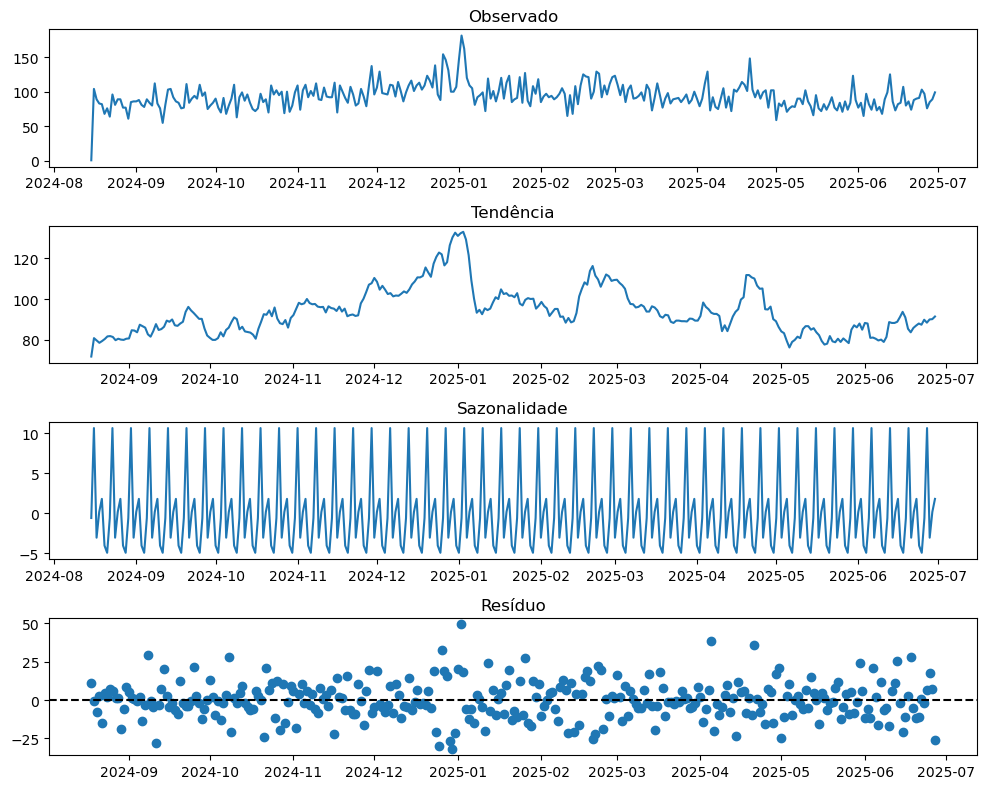

In [152]:
from statsmodels.tsa.seasonal import seasonal_decompose

res2 = seasonal_decompose(serie_temporal, model='additive')

import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))
ax1.plot(res2.observed)
ax1.set_title('Observado')

ax2.plot(res2.trend)
ax2.set_title('Tendência')

ax3.plot(res2.seasonal)
ax3.set_title('Sazonalidade')

ax4.scatter(serie_temporal.index, res2.resid)
ax4.axhline(0, linestyle='dashed', color='black')
ax4.set_title('Resíduo')

plt.tight_layout()
plt.show()

In [153]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [154]:
from prophet import Prophet
prophet_data = grandeSP[['DATA E HORA INICIO', 'DATA E HORA FIM']].rename(columns={'DATA E HORA INICIO': 'ds', 'DATA E HORA FIM': 'y'})
modelo = Prophet()
modelo.fit(prophet_data)
futuro = modelo.make_future_dataframe(periods=30) # Forecast for the next 30 days
forecast = modelo.predict(futuro)
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

09:58:51 - cmdstanpy - INFO - Chain [1] start processing
09:58:51 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
7508,2025-07-26 20:17:35,1.753562e+18,1.753454e+18,1.753664e+18
7509,2025-07-27 20:17:35,1.753650e+18,1.753539e+18,1.753761e+18
7510,2025-07-28 20:17:35,1.753740e+18,1.753633e+18,1.753851e+18
7511,2025-07-29 20:17:35,1.753826e+18,1.753723e+18,1.753938e+18
7512,2025-07-30 20:17:35,1.753910e+18,1.753808e+18,1.754023e+18


In [155]:
from prophet import Prophet

df['data'] = df['DATA E HORA INICIO'].dt.date
df_diaria = df.groupby('data').size().reset_index(name='quantidade_incidentes')
df_diaria.rename(columns={'data': 'ds', 'quantidade_incidentes': 'y'}, inplace=True)
df_diaria['ds'] = pd.to_datetime(df_diaria['ds'])

train = df_diaria[:-5].copy()
test = df_diaria[-5:].copy()

#mm 317~337 https://portal.inmet.gov.br/dadoshistoricos
mm = 327 
train['cap'] = mm
test['cap'] = mm

profeta = Prophet(growth='logistic')
profeta.fit(train)

future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = mm
forecast = profeta.predict(future_dates)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


09:58:52 - cmdstanpy - INFO - Chain [1] start processing
09:58:52 - cmdstanpy - INFO - Chain [1] done processing


            ds       yhat  yhat_lower  yhat_upper
510 2026-01-07  63.985917   44.101196   85.090512
511 2026-01-08  66.229864   46.823343   87.166918
512 2026-01-09  80.151412   59.700391  100.892963
513 2026-01-10  65.852162   45.152142   88.144532
514 2026-01-11  68.598583   49.580436   89.492554


In [156]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de incidentes fluviais na Grande São Paulo')
fig.show()